In-depth analysis for the paper.

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 10)

### Data processing

In [109]:
filenames = ['conflicts', 'branches', 'wall_time', 'status', 'obj_value']
ORTOOLS_PATH = '../../data/statistics/ortools/'
SPROLOG_PATH = '../../data/statistics/prolog/'
DOCPLEX_PATH = '../../data/statistics/docplex/'

ortools_files = [open(ORTOOLS_PATH + filename + '.txt') for filename in filenames]
sprolog_files = [open(SPROLOG_PATH + filename + '.txt') for filename in filenames]
docplex_files = [open(DOCPLEX_PATH + filename + '.txt') for filename in filenames]

tests = ['n_jobs', 'percent_alt_jobs',
         'n_machines', 'percent_alt_machines',
         'avg_task_size', 'production_range',
         'time_usage', 'over_time_hours',
         'time_out']


In [110]:
test_info = {}
for test in tests:
    test_info[test] = {}

for ortools_file, sprolog_file, docplex_file, filename in zip(ortools_files, sprolog_files, docplex_files, filenames):
    for test in tests:
        test_info[test]['ortools_' + filename] = ortools_file.readline().strip('\n').split(',')[1:]
        test_info[test]['sprolog_' + filename] = sprolog_file.readline().strip('\n').split(',')[1:]
        test_info[test]['docplex_' + filename] = docplex_file.readline().strip('\n').split(',')[1:]

for test in tests:
    test_info[test] = pd.DataFrame.from_dict(test_info[test])



In [111]:
test_info['n_jobs']['n_jobs'] = [2, 5, 10, 20, 40, 60, 80, 100, 125, 150]

test_info['percent_alt_jobs']['percent_alt_jobs'] = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

test_info['n_machines']['n_machines'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

test_info['percent_alt_machines']['percent_alt_machines'] = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

test_info['avg_task_size']['avg_task_size'] = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1250, 1500, 2000, 2500]

test_info['production_range']['production_range'] = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20]

test_info['time_usage']['time_usage'] = [50, 60, 70, 80, 90, 100]

test_info['over_time_hours']['over_time_hours'] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

test_info['time_out']['time_out'] = list(range(1,188+1))

In [112]:
n_jobs_conflicts = test_info['n_jobs'][['n_jobs', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
n_jobs_branches  = test_info['n_jobs'][['n_jobs', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
n_jobs_wall_time = test_info['n_jobs'][['n_jobs', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
n_jobs_status    = test_info['n_jobs'][['n_jobs', 'ortools_status', 'sprolog_status', 'docplex_status']]
n_jobs_obj_value = test_info['n_jobs'][['n_jobs', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

percent_alt_jobs_conflicts = test_info['percent_alt_jobs'][['percent_alt_jobs', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
percent_alt_jobs_branches  = test_info['percent_alt_jobs'][['percent_alt_jobs', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
percent_alt_jobs_wall_time = test_info['percent_alt_jobs'][['percent_alt_jobs', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
percent_alt_jobs_status    = test_info['percent_alt_jobs'][['percent_alt_jobs', 'ortools_status', 'sprolog_status', 'docplex_status']]
percent_alt_jobs_obj_value = test_info['percent_alt_jobs'][['percent_alt_jobs', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

n_machines_conflicts = test_info['n_machines'][['n_machines', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
n_machines_branches  = test_info['n_machines'][['n_machines', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
n_machines_wall_time = test_info['n_machines'][['n_machines', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
n_machines_status    = test_info['n_machines'][['n_machines', 'ortools_status', 'sprolog_status', 'docplex_status']]
n_machines_obj_value = test_info['n_machines'][['n_machines', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

percent_alt_machines_conflicts = test_info['percent_alt_machines'][['percent_alt_machines', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
percent_alt_machines_branches  = test_info['percent_alt_machines'][['percent_alt_machines', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
percent_alt_machines_wall_time = test_info['percent_alt_machines'][['percent_alt_machines', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
percent_alt_machines_status    = test_info['percent_alt_machines'][['percent_alt_machines', 'ortools_status', 'sprolog_status', 'docplex_status']]
percent_alt_machines_obj_value = test_info['percent_alt_machines'][['percent_alt_machines', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

avg_task_size_conflicts = test_info['avg_task_size'][['avg_task_size', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
avg_task_size_branches  = test_info['avg_task_size'][['avg_task_size', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
avg_task_size_wall_time = test_info['avg_task_size'][['avg_task_size', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
avg_task_size_status    = test_info['avg_task_size'][['avg_task_size', 'ortools_status', 'sprolog_status', 'docplex_status']]
avg_task_size_obj_value = test_info['avg_task_size'][['avg_task_size', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

production_range_conflicts = test_info['production_range'][['production_range', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
production_range_branches  = test_info['production_range'][['production_range', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
production_range_wall_time = test_info['production_range'][['production_range', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
production_range_status    = test_info['production_range'][['production_range', 'ortools_status', 'sprolog_status', 'docplex_status']]
production_range_obj_value = test_info['production_range'][['production_range', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

time_usage_conflicts = test_info['time_usage'][['time_usage', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
time_usage_branches  = test_info['time_usage'][['time_usage', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
time_usage_wall_time = test_info['time_usage'][['time_usage', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
time_usage_status    = test_info['time_usage'][['time_usage', 'ortools_status', 'sprolog_status', 'docplex_status']]
time_usage_obj_value = test_info['time_usage'][['time_usage', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

over_time_hours_conflicts = test_info['over_time_hours'][['over_time_hours', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
over_time_hours_branches  = test_info['over_time_hours'][['over_time_hours', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
over_time_hours_wall_time = test_info['over_time_hours'][['over_time_hours', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
over_time_hours_status    = test_info['over_time_hours'][['over_time_hours', 'ortools_status', 'sprolog_status', 'docplex_status']]
over_time_hours_obj_value = test_info['over_time_hours'][['over_time_hours', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]

time_out_conflicts = test_info['time_out'][['time_out', 'ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']]
time_out_branches  = test_info['time_out'][['time_out', 'ortools_branches', 'sprolog_branches', 'docplex_branches']]
time_out_wall_time = test_info['time_out'][['time_out', 'ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time']]
time_out_status    = test_info['time_out'][['time_out', 'ortools_status', 'sprolog_status', 'docplex_status']]
time_out_obj_value = test_info['time_out'][['time_out', 'ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value']]


In [113]:
# time_out_branches

In [114]:
status_replacements = {'success': 'FEASIBLE', 'Optimal': 'OPTIMAL', 'optimality': 'OPTIMAL', 'time_out': 'TIMED OUT', 'Feasible': 'FEASIBLE'}

# Graphs

## Number of Jobs

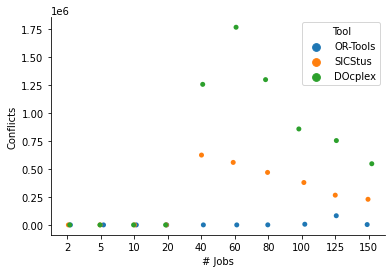

In [115]:
# conflicts
df = n_jobs_conflicts.astype(float).astype(int)

sns_df = df.melt('n_jobs', var_name='Tool', value_name='Conflicts')
sns_df = sns_df.replace({'ortools_conflicts': 'OR-Tools', 'sprolog_conflicts': 'SICStus', 'docplex_conflicts': 'DOcplex'})
sns_df.rename(columns={'n_jobs': '# Jobs'}, inplace=True)

sns.stripplot(x='# Jobs', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

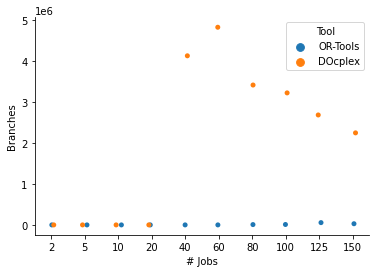

In [116]:
# branches
df = n_jobs_branches.drop(labels='sprolog_branches', axis=1).astype(float).astype(int)

sns_df = df.melt('n_jobs', var_name='Tool', value_name='Branches')
sns_df = sns_df.replace({'ortools_branches': 'OR-Tools', 'sprolog_branches': 'SICStus', 'docplex_branches': 'DOcplex'})
sns_df.rename(columns={'n_jobs': '# Jobs'}, inplace=True)

sns.stripplot(x='# Jobs', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

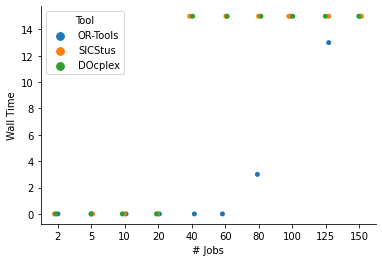

In [117]:
# wall time
df = n_jobs_wall_time.astype(float).astype(int)

sns_df = df.melt('n_jobs', var_name='Tool', value_name='Wall Time')
sns_df = sns_df.replace({'ortools_wall_time': 'OR-Tools', 'sprolog_wall_time': 'SICStus', 'docplex_wall_time': 'DOcplex'})
sns_df.rename(columns={'n_jobs': '# Jobs'}, inplace=True)

sns.stripplot(x='# Jobs', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

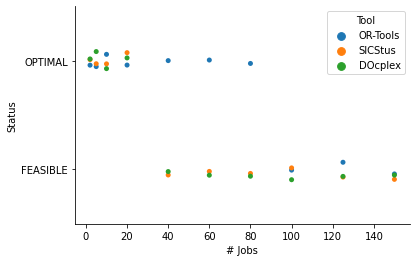

In [118]:
# status
df = n_jobs_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('n_jobs', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)
sns_df = sns_df.replace({'ortools_status': 'OR-Tools', 'sprolog_status': 'SICStus', 'docplex_status': 'DOcplex'})
sns_df.rename(columns={'n_jobs': '# Jobs'}, inplace=True)

sns.stripplot(x="# Jobs", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

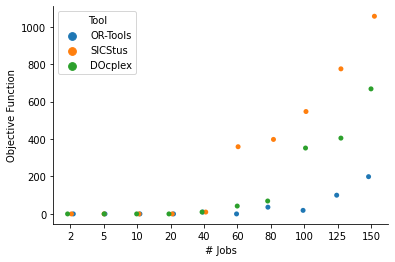

In [119]:
# objective value
df = n_jobs_obj_value.astype(float).astype(int)

sns_df = df.melt('n_jobs', var_name='Tool', value_name='Objective Function')
sns_df = sns_df.replace({'ortools_obj_value': 'OR-Tools', 'sprolog_obj_value': 'SICStus', 'docplex_obj_value': 'DOcplex'})
sns_df.rename(columns={'n_jobs': '# Jobs'}, inplace=True)

sns.stripplot(x='# Jobs', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Percentage of Alternative Jobs 

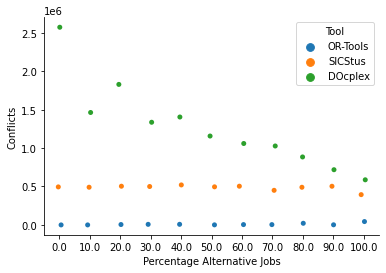

In [120]:
# conflicts
df = percent_alt_jobs_conflicts.astype(float)

sns_df = df.melt('percent_alt_jobs', var_name='Tool', value_name='Conflicts')
sns_df = sns_df.replace({'ortools_conflicts': 'OR-Tools', 'sprolog_conflicts': 'SICStus', 'docplex_conflicts': 'DOcplex'})
sns_df.rename(columns={'percent_alt_jobs': 'Percentage Alternative Jobs'}, inplace=True)

sns.stripplot(x='Percentage Alternative Jobs', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

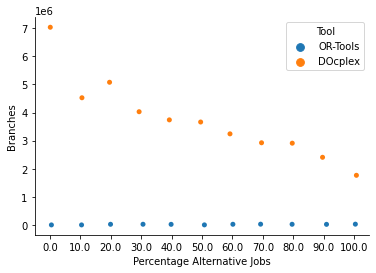

In [121]:
# branches
df = percent_alt_jobs_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('percent_alt_jobs', var_name='Tool', value_name='Branches')
sns_df = sns_df.replace({'ortools_branches': 'OR-Tools', 'sprolog_branches': 'SICStus', 'docplex_branches': 'DOcplex'})
sns_df.rename(columns={'percent_alt_jobs': 'Percentage Alternative Jobs'}, inplace=True)

sns.stripplot(x='Percentage Alternative Jobs', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

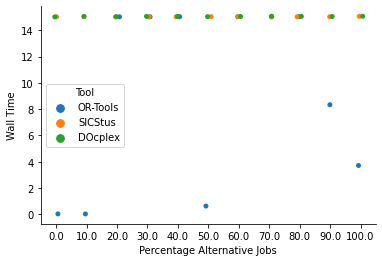

In [122]:
# wall time
df = percent_alt_jobs_wall_time.astype(float)

sns_df = df.melt('percent_alt_jobs', var_name='Tool', value_name='Wall Time')
sns_df = sns_df.replace({'ortools_wall_time': 'OR-Tools', 'sprolog_wall_time': 'SICStus', 'docplex_wall_time': 'DOcplex'})
sns_df.rename(columns={'percent_alt_jobs': 'Percentage Alternative Jobs'}, inplace=True)

sns.stripplot(x='Percentage Alternative Jobs', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

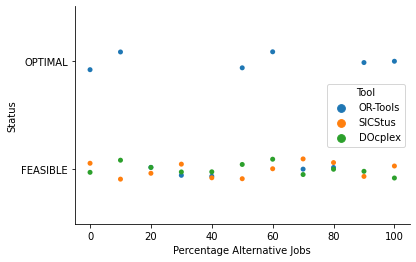

In [123]:
# status
df = percent_alt_jobs_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('percent_alt_jobs', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)
sns_df = sns_df.replace({'ortools_status': 'OR-Tools', 'sprolog_status': 'SICStus', 'docplex_status': 'DOcplex'})
sns_df.rename(columns={'percent_alt_jobs': 'Percentage Alternative Jobs'}, inplace=True)

sns.stripplot(x="Percentage Alternative Jobs", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

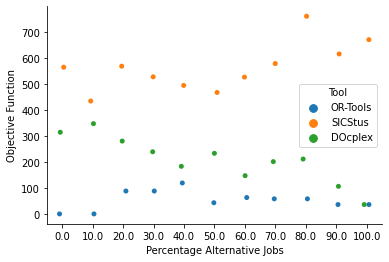

In [124]:
# objective value
df = percent_alt_jobs_obj_value.astype(float)

sns_df = df.melt('percent_alt_jobs', var_name='Tool', value_name='Objective Function')
sns_df = sns_df.replace({'ortools_obj_value': 'OR-Tools', 'sprolog_obj_value': 'SICStus', 'docplex_obj_value': 'DOcplex'})
sns_df.rename(columns={'percent_alt_jobs': 'Percentage Alternative Jobs'}, inplace=True)

sns.stripplot(x='Percentage Alternative Jobs', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Number of Machines

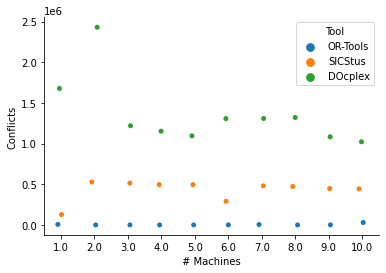

In [125]:
# conflicts
df = n_machines_conflicts.astype(float)

sns_df = df.melt('n_machines', var_name='Tool', value_name='Conflicts')
sns_df = sns_df.replace({'ortools_conflicts': 'OR-Tools', 'sprolog_conflicts': 'SICStus', 'docplex_conflicts': 'DOcplex'})
sns_df.rename(columns={'n_machines': '# Machines'}, inplace=True)

sns.stripplot(x='# Machines', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

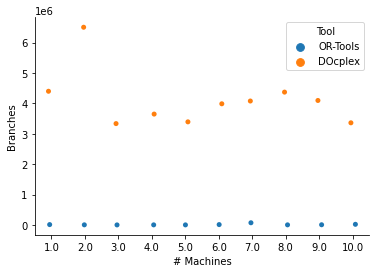

In [126]:
# branches
df = n_machines_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('n_machines', var_name='Tool', value_name='Branches')
sns_df = sns_df.replace({'ortools_branches': 'OR-Tools', 'sprolog_branches': 'SICStus', 'docplex_branches': 'DOcplex'})
sns_df.rename(columns={'n_machines': '# Machines'}, inplace=True)

sns.stripplot(x='# Machines', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

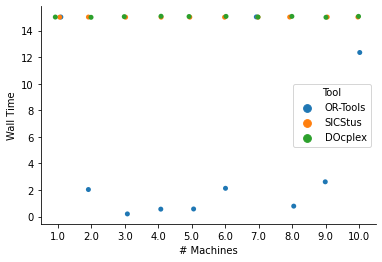

In [127]:
# wall time
df = n_machines_wall_time.astype(float)

sns_df = df.melt('n_machines', var_name='Tool', value_name='Wall Time')
sns_df = sns_df.replace({'ortools_wall_time': 'OR-Tools', 'sprolog_wall_time': 'SICStus', 'docplex_wall_time': 'DOcplex'})
sns_df.rename(columns={'n_machines': '# Machines'}, inplace=True)

sns.stripplot(x='# Machines', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

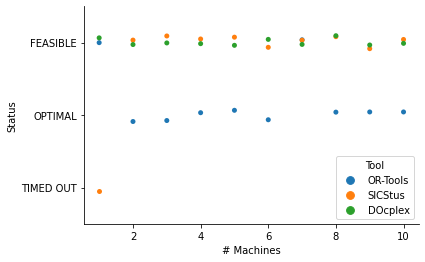

In [128]:
# status
df = n_machines_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('n_machines', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)
sns_df = sns_df.replace({'ortools_status': 'OR-Tools', 'sprolog_status': 'SICStus', 'docplex_status': 'DOcplex'})
sns_df.rename(columns={'n_machines': '# Machines'}, inplace=True)

sns.stripplot(x="# Machines", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

C:\Users\joaos\AppData\Local\Temp\ipykernel_15664\3756734084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_machines_obj_value['sprolog_obj_value'] = n_machines_obj_value['sprolog_obj_value'].replace(' _1857133', np.NaN)


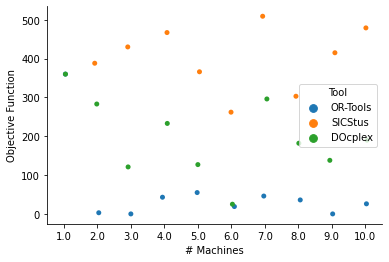

In [129]:
# objective value
n_machines_obj_value['sprolog_obj_value'] = n_machines_obj_value['sprolog_obj_value'].replace(' _1857133', np.NaN)

df = n_machines_obj_value.astype(float)

sns_df = df.melt('n_machines', var_name='Tool', value_name='Objective Function')
sns_df = sns_df.replace({'ortools_obj_value': 'OR-Tools', 'sprolog_obj_value': 'SICStus', 'docplex_obj_value': 'DOcplex'})
sns_df.rename(columns={'n_machines': '# Machines'}, inplace=True)

sns.stripplot(x='# Machines', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Percentage of Alternative Machines

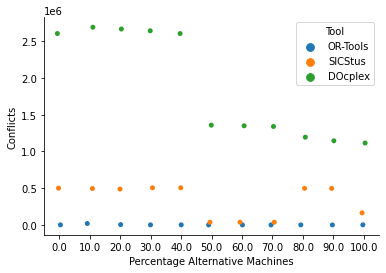

In [130]:
# conflicts
df = percent_alt_machines_conflicts.astype(float)

sns_df = df.melt('percent_alt_machines', var_name='Tool', value_name='Conflicts')
sns_df = sns_df.replace({'ortools_conflicts': 'OR-Tools', 'sprolog_conflicts': 'SICStus', 'docplex_conflicts': 'DOcplex'})
sns_df.rename(columns={'percent_alt_machines': 'Percentage Alternative Machines'}, inplace=True)

sns.stripplot(x='Percentage Alternative Machines', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

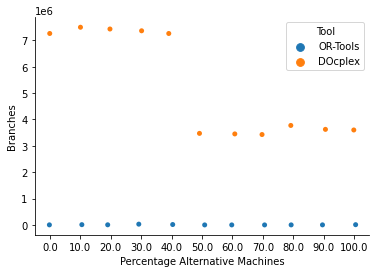

In [131]:
# branches
df = percent_alt_machines_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('percent_alt_machines', var_name='Tool', value_name='Branches')
sns_df = sns_df.replace({'ortools_branches': 'OR-Tools', 'sprolog_branches': 'SICStus', 'docplex_branches': 'DOcplex'})
sns_df.rename(columns={'percent_alt_machines': 'Percentage Alternative Machines'}, inplace=True)

sns.stripplot(x='Percentage Alternative Machines', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

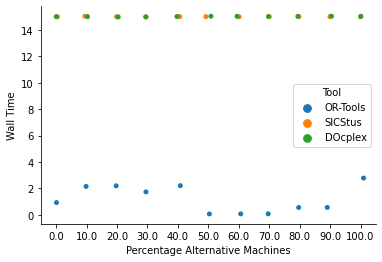

In [132]:
# wall time
df = percent_alt_machines_wall_time.astype(float)

sns_df = df.melt('percent_alt_machines', var_name='Tool', value_name='Wall Time')
sns_df = sns_df.replace({'ortools_wall_time': 'OR-Tools', 'sprolog_wall_time': 'SICStus', 'docplex_wall_time': 'DOcplex'})
sns_df.rename(columns={'percent_alt_machines': 'Percentage Alternative Machines'}, inplace=True)

sns.stripplot(x='Percentage Alternative Machines', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

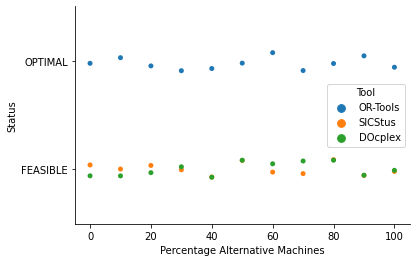

In [133]:
# status
df = percent_alt_machines_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('percent_alt_machines', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)
sns_df = sns_df.replace({'ortools_status': 'OR-Tools', 'sprolog_status': 'SICStus', 'docplex_status': 'DOcplex'})
sns_df.rename(columns={'percent_alt_machines': 'Percentage Alternative Machines'}, inplace=True)

sns.stripplot(x="Percentage Alternative Machines", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

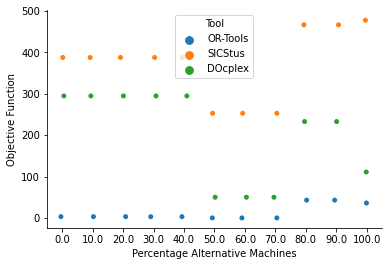

In [134]:
# objective value
df = percent_alt_machines_obj_value.astype(float)

sns_df = df.melt('percent_alt_machines', var_name='Tool', value_name='Objective Function')
sns_df = sns_df.replace({'ortools_obj_value': 'OR-Tools', 'sprolog_obj_value': 'SICStus', 'docplex_obj_value': 'DOcplex'})
sns_df.rename(columns={'percent_alt_machines': 'Percentage Alternative Machines'}, inplace=True)

sns.stripplot(x='Percentage Alternative Machines', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Average Size Task

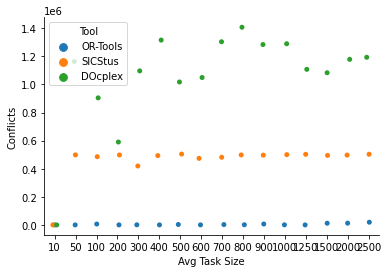

In [135]:
# conflicts
df = avg_task_size_conflicts.astype(int)

sns_df = df.melt('avg_task_size', var_name='Tool', value_name='Conflicts')
sns_df = sns_df.replace({'ortools_conflicts': 'OR-Tools', 'sprolog_conflicts': 'SICStus', 'docplex_conflicts': 'DOcplex'})
sns_df.rename(columns={'avg_task_size': 'Avg Task Size'}, inplace=True)

sns.stripplot(x='Avg Task Size', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

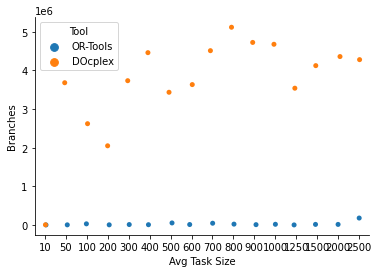

In [136]:
# branches
df = avg_task_size_branches.drop(labels='sprolog_branches', axis=1).astype(int)

sns_df = df.melt('avg_task_size', var_name='Tool', value_name='Branches')
sns_df = sns_df.replace({'ortools_branches': 'OR-Tools', 'sprolog_branches': 'SICStus', 'docplex_branches': 'DOcplex'})
sns_df.rename(columns={'avg_task_size': 'Avg Task Size'}, inplace=True)

sns.stripplot(x='Avg Task Size', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

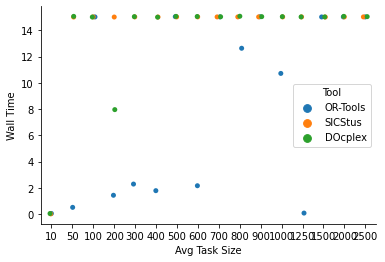

In [137]:
# wall time
df = avg_task_size_wall_time.astype(float)
df['avg_task_size'] = df['avg_task_size'].astype(int)
sns_df = df.melt('avg_task_size', var_name='Tool', value_name='Wall Time')
sns_df = sns_df.replace({'ortools_wall_time': 'OR-Tools', 'sprolog_wall_time': 'SICStus', 'docplex_wall_time': 'DOcplex'})
sns_df.rename(columns={'avg_task_size': 'Avg Task Size'}, inplace=True)

sns.stripplot(x='Avg Task Size', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

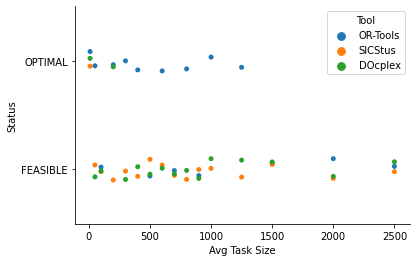

In [138]:
# status
df = avg_task_size_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('avg_task_size', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)
sns_df = sns_df.replace({'ortools_status': 'OR-Tools', 'sprolog_status': 'SICStus', 'docplex_status': 'DOcplex'})
sns_df.rename(columns={'avg_task_size': 'Avg Task Size'}, inplace=True)

sns.stripplot(x="Avg Task Size", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

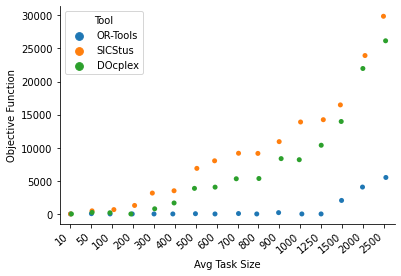

In [139]:
# objective value
df = avg_task_size_obj_value.astype(float).astype(int)

sns_df = df.melt('avg_task_size', var_name='Tool', value_name='Objective Function')
sns_df = sns_df.replace({'ortools_obj_value': 'OR-Tools', 'sprolog_obj_value': 'SICStus', 'docplex_obj_value': 'DOcplex'})
sns_df.rename(columns={'avg_task_size': 'Avg Task Size'}, inplace=True)

ax = sns.stripplot(x='Avg Task Size', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine()

## Production Range

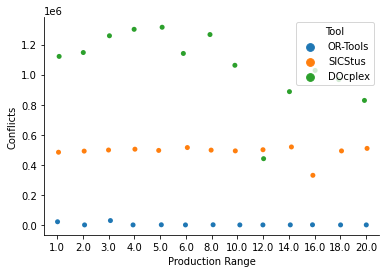

In [140]:
# conflicts
df = production_range_conflicts.astype(float)

sns_df = df.melt('production_range', var_name='Tool', value_name='Conflicts')
sns_df = sns_df.replace({'ortools_conflicts': 'OR-Tools', 'sprolog_conflicts': 'SICStus', 'docplex_conflicts': 'DOcplex'})
sns_df.rename(columns={'production_range': 'Production Range'}, inplace=True)

sns.stripplot(x='Production Range', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

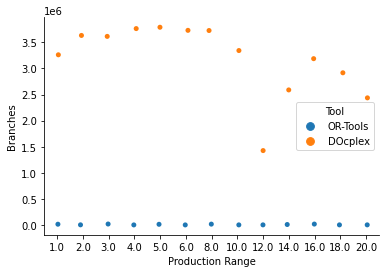

In [141]:
# branches
df = production_range_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('production_range', var_name='Tool', value_name='Branches')
sns_df = sns_df.replace({'ortools_branches': 'OR-Tools', 'sprolog_branches': 'SICStus', 'docplex_branches': 'DOcplex'})
sns_df.rename(columns={'production_range': 'Production Range'}, inplace=True)

sns.stripplot(x='Production Range', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

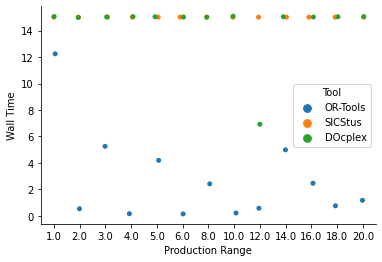

In [142]:
# wall time
df = production_range_wall_time.astype(float)

sns_df = df.melt('production_range', var_name='Tool', value_name='Wall Time')
sns_df = sns_df.replace({'ortools_wall_time': 'OR-Tools', 'sprolog_wall_time': 'SICStus', 'docplex_wall_time': 'DOcplex'})
sns_df.rename(columns={'production_range': 'Production Range'}, inplace=True)

sns.stripplot(x='Production Range', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

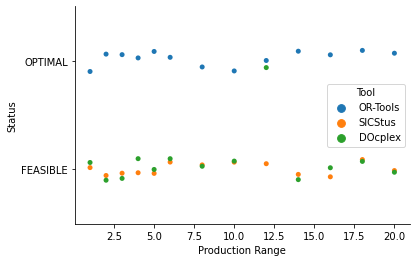

In [143]:
# status
df = production_range_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('production_range', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)
sns_df = sns_df.replace({'ortools_status': 'OR-Tools', 'sprolog_status': 'SICStus', 'docplex_status': 'DOcplex'})
sns_df.rename(columns={'production_range': 'Production Range'}, inplace=True)

sns.stripplot(x="Production Range", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

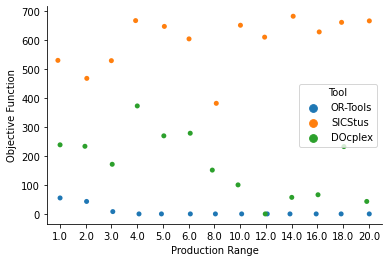

In [144]:
# objective value
df = production_range_obj_value.astype(float)

sns_df = df.melt('production_range', var_name='Tool', value_name='Objective Function')
sns_df = sns_df.replace({'ortools_obj_value': 'OR-Tools', 'sprolog_obj_value': 'SICStus', 'docplex_obj_value': 'DOcplex'})
sns_df.rename(columns={'production_range': 'Production Range'}, inplace=True)

sns.stripplot(x='Production Range', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Time Usage

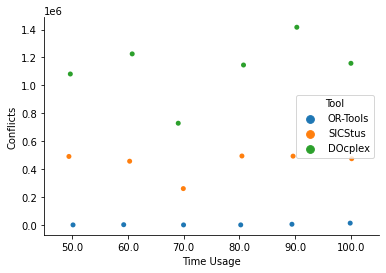

In [145]:
# conflicts
df = time_usage_conflicts.astype(float)

sns_df = df.melt('time_usage', var_name='Tool', value_name='Conflicts')
sns_df = sns_df.replace({'ortools_conflicts': 'OR-Tools', 'sprolog_conflicts': 'SICStus', 'docplex_conflicts': 'DOcplex'})
sns_df.rename(columns={'time_usage': 'Time Usage'}, inplace=True)

sns.stripplot(x='Time Usage', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

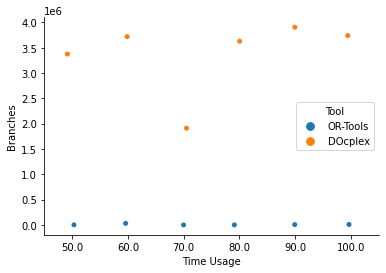

In [146]:
# branches
df = time_usage_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('time_usage', var_name='Tool', value_name='Branches')
sns_df = sns_df.replace({'ortools_branches': 'OR-Tools', 'sprolog_branches': 'SICStus', 'docplex_branches': 'DOcplex'})
sns_df.rename(columns={'time_usage': 'Time Usage'}, inplace=True)

sns.stripplot(x='Time Usage', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

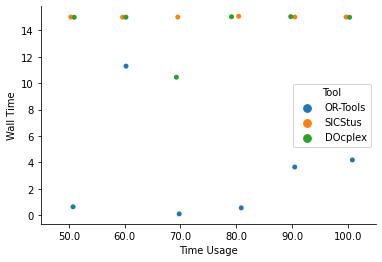

In [147]:
# wall time
df = time_usage_wall_time.astype(float)

sns_df = df.melt('time_usage', var_name='Tool', value_name='Wall Time')
sns_df = sns_df.replace({'ortools_wall_time': 'OR-Tools', 'sprolog_wall_time': 'SICStus', 'docplex_wall_time': 'DOcplex'})
sns_df.rename(columns={'time_usage': 'Time Usage'}, inplace=True)

sns.stripplot(x='Time Usage', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

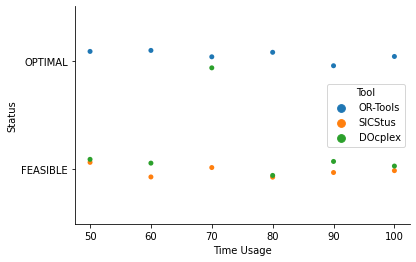

In [148]:
# status
df = time_usage_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('time_usage', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)
sns_df = sns_df.replace({'ortools_status': 'OR-Tools', 'sprolog_status': 'SICStus', 'docplex_status': 'DOcplex'})
sns_df.rename(columns={'time_usage': 'Time Usage'}, inplace=True)

sns.stripplot(x="Time Usage", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

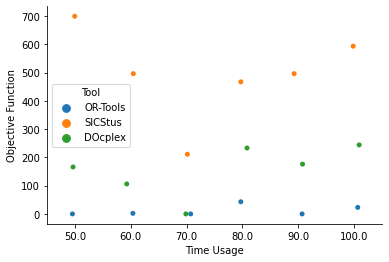

In [149]:
# objective value
df = time_usage_obj_value.astype(float)

sns_df = df.melt('time_usage', var_name='Tool', value_name='Objective Function')
sns_df = sns_df.replace({'ortools_obj_value': 'OR-Tools', 'sprolog_obj_value': 'SICStus', 'docplex_obj_value': 'DOcplex'})
sns_df.rename(columns={'time_usage': 'Time Usage'}, inplace=True)

sns.stripplot(x='Time Usage', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Overtime Hours

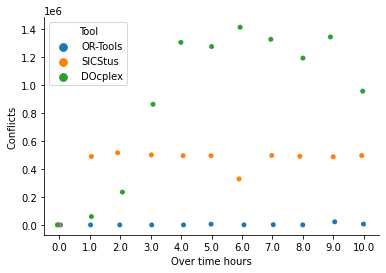

In [150]:
# conflicts
df = over_time_hours_conflicts.astype(float)

# ax = df.plot(y=['ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts'])
# ax.set_xlabel("Overtime (in hours)")
# ax.set_ylabel("Number of Conflicts")
# ax.legend(["OR-Tools", "SICStus", "DOcplex"])

sns_df = df.melt('over_time_hours', var_name='Tool', value_name='Conflicts')
sns_df = sns_df.replace({'ortools_conflicts': 'OR-Tools', 'sprolog_conflicts': 'SICStus', 'docplex_conflicts': 'DOcplex'})
sns_df.rename(columns={'over_time_hours': 'Over time hours'}, inplace=True)

sns.stripplot(x='Over time hours', y='Conflicts', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

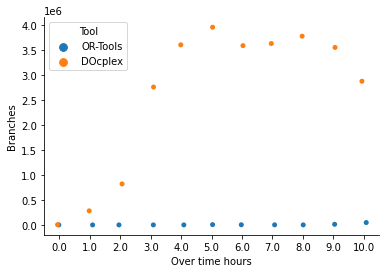

In [151]:
# branches
df = over_time_hours_branches.drop(labels='sprolog_branches', axis=1).astype(float)

sns_df = df.melt('over_time_hours', var_name='Tool', value_name='Branches')
sns_df = sns_df.replace({'ortools_branches': 'OR-Tools', 'sprolog_branches': 'SICStus', 'docplex_branches': 'DOcplex'})
sns_df.rename(columns={'over_time_hours': 'Over time hours'}, inplace=True)

sns.stripplot(x='Over time hours', y='Branches', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

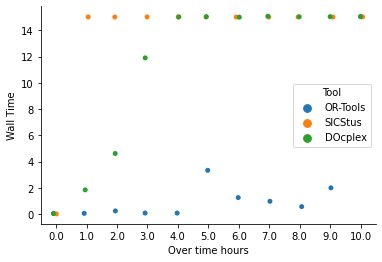

In [152]:
# wall time
df = over_time_hours_wall_time.astype(float)

sns_df = df.melt('over_time_hours', var_name='Tool', value_name='Wall Time')
sns_df = sns_df.replace({'ortools_wall_time': 'OR-Tools', 'sprolog_wall_time': 'SICStus', 'docplex_wall_time': 'DOcplex'})
sns_df.rename(columns={'over_time_hours': 'Over time hours'}, inplace=True)

sns.stripplot(x='Over time hours', y='Wall Time', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

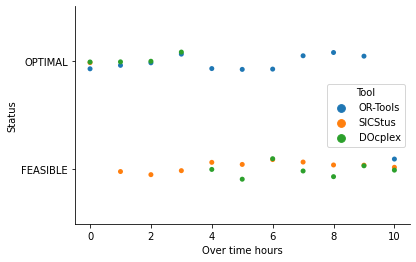

In [153]:
# status
df = over_time_hours_status

# 'ortools_status', 'sprolog_status', 'docplex_status'
sns_df = df.melt('over_time_hours', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)
sns_df = sns_df.replace({'ortools_status': 'OR-Tools', 'sprolog_status': 'SICStus', 'docplex_status': 'DOcplex'})
sns_df.rename(columns={'over_time_hours': 'Over time hours'}, inplace=True)

sns.stripplot(x="Over time hours", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

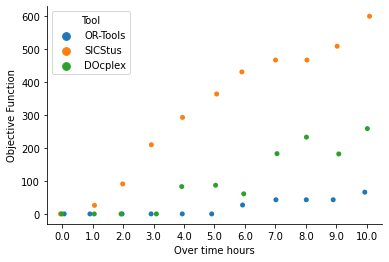

In [154]:
# objective value
df = over_time_hours_obj_value.astype(float)

sns_df = df.melt('over_time_hours', var_name='Tool', value_name='Objective Function')
sns_df = sns_df.replace({'ortools_obj_value': 'OR-Tools', 'sprolog_obj_value': 'SICStus', 'docplex_obj_value': 'DOcplex'})
sns_df.rename(columns={'over_time_hours': 'Over time hours'}, inplace=True)

sns.stripplot(x='Over time hours', y='Objective Function', data=sns_df, hue='Tool', jitter=0.1)
sns.despine()

## Timeout

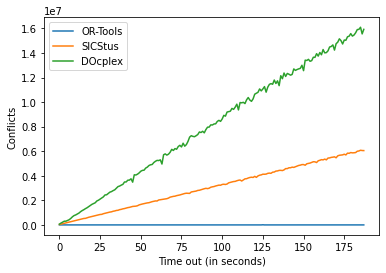

In [155]:
# conflicts
df = time_out_conflicts.astype(float)

ax = df.plot(y=['ortools_conflicts', 'sprolog_conflicts', 'docplex_conflicts']) #, style=["-.", "-", "-."])
ax.set_xlabel("Time out (in seconds)")
ax.set_ylabel("Conflicts")
ax.legend(["OR-Tools", "SICStus", "DOcplex"])

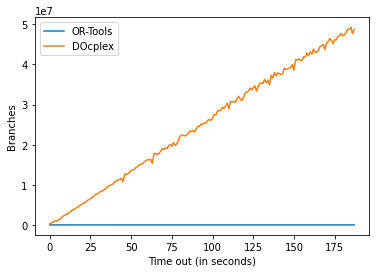

In [156]:
# branches
df = time_out_branches.drop(labels='sprolog_branches', axis=1).astype(float)

ax = df.plot(y=['ortools_branches', 'docplex_branches'])  # Prolog branches doesnt work
ax.set_xlabel("Time out (in seconds)")
ax.set_ylabel("Branches")
ax.legend(["OR-Tools", "DOcplex"])

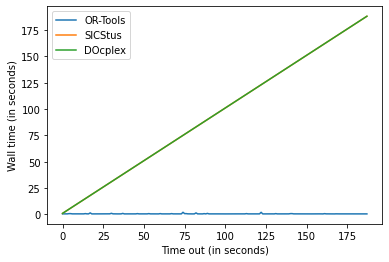

In [157]:
# wall time
df = time_out_wall_time.astype(float)

ax = df.plot(y=['ortools_wall_time', 'sprolog_wall_time', 'docplex_wall_time'])
ax.set_xlabel("Time out (in seconds)")
ax.set_ylabel("Wall time (in seconds)")
ax.legend(["OR-Tools", "SICStus", "DOcplex"])

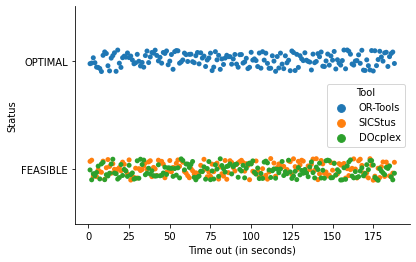

In [158]:
# status
df = time_out_status

sns_df = df.melt('time_out', var_name='Tool', value_name='Status')

sns_df['Status'] = sns_df['Status'].str.strip().replace(status_replacements)
sns_df = sns_df.replace({'ortools_status': 'OR-Tools', 'sprolog_status': 'SICStus', 'docplex_status': 'DOcplex'})
sns_df.rename(columns={'time_out': 'Time out (in seconds)'}, inplace=True)

sns.stripplot(x="Time out (in seconds)", y='Status', hue='Tool', data=sns_df, jitter=0.1)
sns.despine()

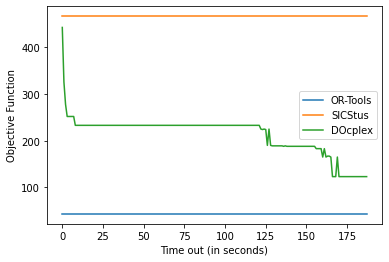

In [159]:
# objective value
df = time_out_obj_value.astype(float).astype(int)

ax = df.plot(y=['ortools_obj_value', 'sprolog_obj_value', 'docplex_obj_value'])
ax.set_xlabel("Time out (in seconds)")
ax.set_ylabel("Objective Function")
ax.legend(["OR-Tools", "SICStus", "DOcplex"])